In [1]:
#Tabular Playground Series - Jun 2021
#Link Below
#https://www.kaggle.com/competitions/tabular-playground-series-jun-2021

import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import matplotlib
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
# Show versions of libraries
print(f'Versions - Scikit-Learn={sklearn.__version__}\t Pandas={pd.__version__}  \t Numpy={np.__version__}')
print(f'           Matplotlib={matplotlib.__version__}\t Seaborn={sns.__version__}')

Versions - Scikit-Learn=1.6.0	 Pandas=2.2.3  	 Numpy=2.2.1
           Matplotlib=3.10.0	 Seaborn=0.13.2


In [3]:
random_state = 42
np.random.seed(random_state) # this sets the random sequence. Setting only this the repeatability is guaranteed
                             # only if we re-execute the entire notebook

# load train and test and show the shapes
df = pd.read_csv('train.csv')

print(df.shape)
df.head()

(200000, 77)


,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,...,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,...,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2


In [4]:
# show 10 random records
df.sample(10, random_state=random_state)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
119737,119737,0,0,15,0,0,0,0,0,11,...,0,0,1,0,0,0,1,0,0,Class_3
72272,72272,0,0,1,0,0,1,0,0,0,...,0,0,0,0,3,0,0,0,0,Class_6
158154,158154,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_6
65426,65426,6,0,0,0,0,2,0,0,0,...,3,7,2,1,0,0,0,1,1,Class_8
30074,30074,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_1
23677,23677,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
134858,134858,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,Class_9
176418,176418,0,0,0,0,0,14,0,0,0,...,0,0,1,1,1,2,0,0,0,Class_2
132467,132467,0,2,1,3,1,0,0,7,8,...,0,1,0,0,20,18,1,0,1,Class_8
4082,4082,40,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,Class_5


In [5]:
# number of unique values
df.nunique().sort_values(ascending=False)[:30]

id            200000
feature_15       105
feature_60        99
feature_59        92
feature_73        91
feature_46        87
feature_28        78
feature_32        77
feature_54        72
feature_61        70
feature_63        70
feature_19        66
feature_55        65
feature_47        63
feature_62        61
feature_3         59
feature_29        58
feature_67        57
feature_41        56
feature_22        55
feature_5         55
feature_43        53
feature_69        52
feature_9         51
feature_24        50
feature_74        50
feature_70        49
feature_27        49
feature_51        49
feature_2         48
dtype: int64

In [6]:
df.describe()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,99999.500000,0.972710,1.168365,2.219325,2.296735,0.793530,1.431105,1.010695,0.673090,1.94398,...,1.798040,0.508695,1.827300,0.910370,1.603585,1.219210,0.806895,1.282925,2.94021,0.632005
std,57735.171256,3.941836,3.993407,6.476570,7.551858,2.935785,5.162746,3.949231,2.234949,3.93133,...,5.053014,1.867330,7.188924,3.835182,4.877679,4.826003,2.458741,4.261420,10.78465,3.925310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,49999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,99999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,149999.250000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.00000,...,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,199999.000000,61.000000,51.000000,64.000000,70.000000,38.000000,76.000000,43.000000,30.000000,38.00000,...,54.000000,24.000000,79.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.00000,52.000000


In [7]:
# show target labels
target = 'target'
classes = df[target].unique()
classes.sort()
classes

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

In [8]:
le = LabelEncoder()
y = le.fit_transform(df[target])
X_full = df.drop(['id', target], axis=1)

In [9]:
# show X_full
X_full.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,6,1,0,0,0,0,7,0,...,3,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,3,0,0,...,8,0,0,0,0,1,0,0,0,0
3,0,0,7,0,1,5,2,2,0,1,...,0,0,4,0,2,2,0,4,3,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# during development use only a pair of usually fast models
model_lbls = ['dt', # decision tree
             'nb' # gaussian naive bayes
             #,'rf'   # random forest
             ,'lp'   # linear perceptron
             #,'svc'  # support vector
             #,'knn'  # k nearest neighbours
             #,'adb'  # adaboost
            ]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(random_state=random_state),
           'param': [{'max_depth': [*range(1,20)],'class_weight':[None,'balanced']}],
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': [{'var_smoothing': [10**exp for exp in range(-3,-12,-1)]}]
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(random_state=random_state),
           'param': [{'early_stopping': [True,False],'class_weight':[None,'balanced']}],
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(random_state=random_state),
           'param': [{'kernel': ['rbf'],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100],
                    },
                   ]
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': [{'n_neighbors': list(range(1,7))}]
       },
    'adb':{'name': 'AdaBoost           ',
           'estimator': AdaBoostClassifier(random_state=random_state),
           'param': [{'n_estimators':[20,30,40,50]
                     ,'learning_rate':[0.5,0.75,1,1.25,1.5]}]
          },
    'rf': {'name': 'Random forest       ',
           'estimator': RandomForestClassifier(random_state=random_state),
           'param': [{
                      # 'max_depth': [*range(4,30)]
                      'max_depth': [*range(4,30,4)]
                    #  ,'n_estimators':[*range(20,80,5)]
                     ,'n_estimators':[*range(10,30,5)]
                     ,'class_weight': [None,'balanced']
                      }]
          }

}


[0.11669831 0.07591789 0.05308423 0.04570598 0.03864043 0.03184003
 0.03012308 0.02934325 0.02765308 0.02628103 0.02476721 0.02408011
 0.02304794 0.02192776 0.02063361 0.01896836 0.01795094 0.0171754
 0.01612948 0.01516765 0.01461421 0.01389225 0.01325595 0.0127744
 0.01232842 0.01184508 0.01162701 0.0112386  0.01072903 0.01029036
 0.00927199 0.00903617 0.00854496 0.00809131 0.00792701 0.00746077
 0.00720115 0.00693542 0.00688668 0.00686254 0.0067852  0.00669558
 0.00657856 0.00651044 0.00635624 0.00599466 0.00556866 0.00544044
 0.00524656 0.00504432 0.00483356 0.00411028 0.00381469 0.00372358
 0.00369381 0.00351625 0.00343449 0.00327978 0.00318041 0.00311074
 0.00272257 0.00270213 0.00238233 0.00218239 0.00211184 0.00206021
 0.00195977 0.0019241  0.00183644 0.00167358 0.00156027 0.00137893
 0.00124575 0.00088061 0.00051175] (200000, 75)


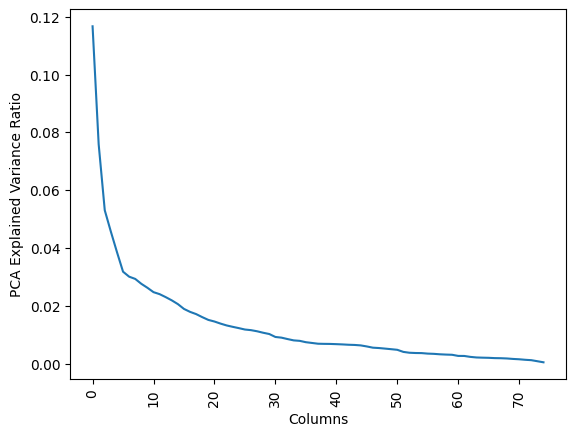

In [11]:
# Sort the explained variance ratios in descending order
pca = PCA()
X_trans = pca.fit_transform(X_full)

print(pca.explained_variance_ratio_, X_full.shape)

# Calculate the cumulative sum of the explained variance ratios
plt.plot(range(X_full.shape[1]), pca.explained_variance_ratio_);

# Find the index i of the first principal component where the cumulative sum exceeds 0.05
plt.xlabel('Columns')
plt.ylabel('PCA Explained Variance Ratio')
plt.xticks(rotation=90)

# Keep the first i principal components and discard the rest
plt.show()

In [12]:
explained_variances = pca.explained_variance_ratio_

# Sort the explained variance ratios in descending order
sorted_variances = sorted(explained_variances, reverse=True)

# Calculate the cumulative sum of the explained variance ratios
cumulative_variances = np.cumsum(sorted_variances)

cutoff_variance = .8
# Find the index i of the first principal component where the cumulative sum exceeds 0.05
cutoff_index = np.argmax(cumulative_variances > cutoff_variance)
print("Used the top {} transformed variables".format(cutoff_index))

# Keep the first i principal components and discard the rest
X = pca.transform(X_full)[:, :cutoff_index + 1]

Used the top 30 transformed variables


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, random_state=random_state)

print(f"there are {X_train.shape[0]} samples in the training dataset")
print(f"there are {X_test.shape[0]} samples in the training dataset")
print("Each sample has {} features".format(X.shape[1]))

there are 40000 samples in the training dataset
there are 160000 samples in the training dataset
Each sample has 31 features


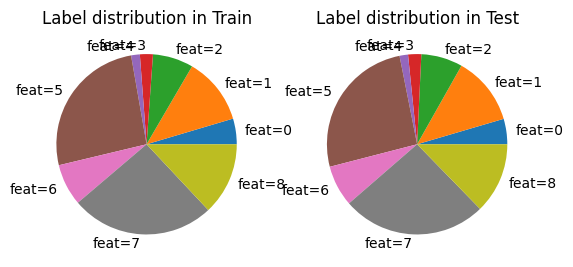

In [44]:
# show frequencies of target labels in train and test
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(np.unique(y_train, return_counts=True)[1], labels=[f"feat={k}" for k in np.unique(y_train, return_counts=True)[0]])
ax1.set_title("Label distribution in Train")
ax2.pie(np.unique(y_test, return_counts=True)[1], labels=[f"feat={k}" for k in np.unique(y_test, return_counts=True)[0]]);
ax2.set_title("Label distribution in Test")
plt.show()

In [45]:
scorings = ['accuracy'
            # ,'precision_macro'
            # ,'recall_macro'
            ,'f1_macro'
            ]

In [46]:
from sklearn.model_selection import ParameterGrid

trials = {lbl: len(list(ParameterGrid(models[lbl]['param']))) for lbl in model_lbls}
trials

{'dt': 38, 'nb': 9, 'lp': 4}

In [47]:
clfs = []
results = pd.DataFrame(columns=['scoring','model','best_params','accuracy','precision_macro','recall_macro','f1_macro'])

In [48]:
# grid search cv

for scoring in scorings:
    for m in model_lbls:
        clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5, scoring = scoring)
        clf.fit(X_train, y_train)
        clfs.append(clf)
        y_true, y_pred = y_test, clf.predict(X_test)
        # y_preds.append(y_pred)
        cr = classification_report(y_true, y_pred, output_dict=True, zero_division=1)
        results.loc[len(results)] = [scoring, models[m]['name'], clf.best_params_
                                    # ,(clf.cv_results_['mean_fit_time'].sum()+clf.cv_results_['mean_score_time'].sum())*n_splits
                                    ,cr['accuracy']
                                    ,cr['macro avg']['precision']
                                    ,cr['macro avg']['recall']
                                    ,cr['macro avg']['f1-score']]

In [49]:
# show results

for score in scorings:
    print(score)
    scoring_filter = score
    display(results[results.scoring==scoring_filter]\
                .sort_values(by=scoring_filter,ascending=False)\
                .drop('scoring',axis=1)\
                .style.format(precision=3)\
                .set_caption('Results for scoring "{}"'.format(scoring_filter)))

accuracy


,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
0,Decision Tree,"{'class_weight': None, 'max_depth': 7}",0.324,0.370,0.164,0.137
2,Linear Perceptron,"{'class_weight': None, 'early_stopping': False}",0.225,0.113,0.114,0.106
1,Gaussian Naive Bayes,{'var_smoothing': 0.0001},0.185,0.128,0.135,0.085


f1_macro


,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
3,Decision Tree,"{'class_weight': None, 'max_depth': 14}",0.270,0.146,0.150,0.143
5,Linear Perceptron,"{'class_weight': None, 'early_stopping': True}",0.180,0.116,0.116,0.106
4,Gaussian Naive Bayes,{'var_smoothing': 1e-05},0.185,0.128,0.135,0.085


    scoring                 model  \
0  accuracy  Decision Tree          
1  accuracy  Gaussian Naive Bayes   
2  accuracy  Linear Perceptron      
3  f1_macro  Decision Tree          
4  f1_macro  Gaussian Naive Bayes   
5  f1_macro  Linear Perceptron      

                                       best_params  accuracy  precision_macro  \
0           {'class_weight': None, 'max_depth': 7}  0.323869         0.369630   
1                        {'var_smoothing': 0.0001}  0.184969         0.128034   
2  {'class_weight': None, 'early_stopping': False}  0.224750         0.113246   
3          {'class_weight': None, 'max_depth': 14}  0.269656         0.146158   
4                         {'var_smoothing': 1e-05}  0.184963         0.128073   
5   {'class_weight': None, 'early_stopping': True}  0.180088         0.115935   

   recall_macro  f1_macro  
0      0.164036  0.136781  
1      0.134937  0.084984  
2      0.114470  0.106171  
3      0.149536  0.143115  
4      0.134941  0.084994  
5   

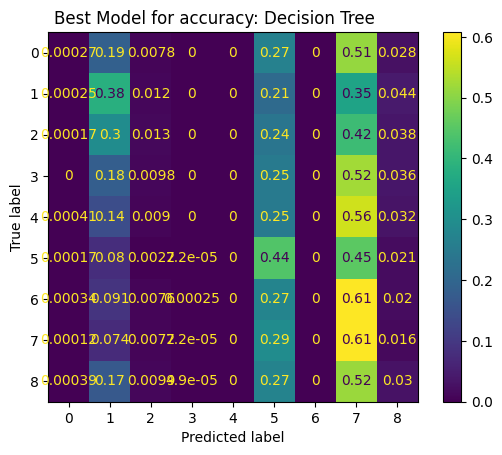

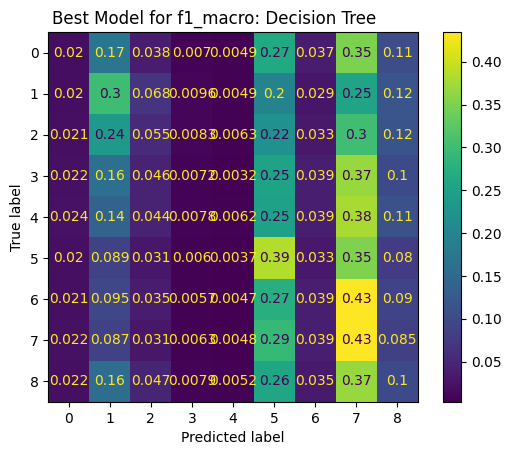

In [50]:
print(results)

for score in scorings:
    scoring_filter = score

    # bests[score] = results.loc[results.scoring==scoring_filter,scoring_filter].idxmax(axis=0)
    best_row = results.loc[results.scoring == scoring_filter, scoring_filter].idxmax(axis=0)
    print(best_row)
    
    disp = ConfusionMatrixDisplay.from_estimator(X=X_test, y=y_test, estimator = clfs[best_row], normalize='true')
    # disp.ax_.set_title("Best Model for {}: {}".format(score,results.at[bests[score],'model']))
    disp.ax_.set_title("Best Model for {}: {}".format(score,results.at[best_row,'model']))
plt.show()

In [21]:
# final test with best model trained on all (train) data